In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline
from timeit import default_timer as timer
from tweepy import OAuthHandler

In [2]:
pd.set_option('display.max_colwidth', -1)

# Gathering Data for this Project

In [3]:
# 1_read twitter_archive_enhanced.csv file
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
#2_downloaded programmatically the file (image_predictions.tsv) which is hosted on Udacity's servers:

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url)

with open('image-predictions.tsv', 'wb') as f:
    f.write(r.content)
    
image_predictions= pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
# Create Tweepy API object
consumer_key = 
consumer_secret = 
access_token = 
access_secret = 



auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
#3_Query Twitter's API for JSON data for each tweet ID in the Twitter archive


tweet_id_list=list(twitter_archive.tweet_id.values)
count = 0
start = timer()
fail_tweets= []
success_tweets=[]
data_tweets=[]

for tweet_id in tweet_id_list:
    count += 1
    print(str(count) + ": " + str(tweet_id))
    
    # for test: start
    #it will run limited number of lines
    #if count > 20:
    #       break
    # end
    
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        data_tweets.append(tweet) 
        success_tweets.append(tweet_id)
        print("Success")
    except :
        print("Fail") 
        fail_tweets.append(tweet_id)
        
            
end = timer()
print(end - start)
print(fail_tweets) 
print(len(fail_tweets)) 

In [ ]:
# write the data onto JSON file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(data_tweets, file)

In [9]:
# read this tweet_json.txt file line by line into a pandas DataFrame with tweet_id, retweet_count
#, and favorites_count and followers_count

tweets_data = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    data = json.load(json_file)
    
    for tweet in data:
        tweet_id = tweet['id']
        followers_count = tweet['user']['followers_count']
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        tweets_data.append({'tweet_id': str(tweet_id),
                            'followers_count': int(followers_count),
                            'favorite_count': int(favorite_count),
                            'retweet_count': int(retweet_count)
                            })
        
tweet_json = pd.DataFrame(tweets_data, columns = ['tweet_id', 'followers_count','favorite_count'
                                                          ,'retweet_count'])

In [10]:
tweet_json.head()

,tweet_id,followers_count,favorite_count,retweet_count
0,892420643555336193,8848624,35747,7561
1,892177421306343426,8848624,30888,5603
2,891815181378084864,8848625,23229,3713
3,891689557279858688,8848625,39051,7745
4,891327558926688256,8848625,37295,8339


# Assessing Data

Assess data visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

### Visual and programmatical assessment: <br>
Each dataset is displayed for visual assessment and then tested with pandas functions:

In [11]:
# 1- twitter_archive assessement:
twitter_archive


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
#check if there is any duplication in the data set
sum(twitter_archive.duplicated())

0

In [14]:
#check if there is any duplication in the tweets id
sum(twitter_archive.text.duplicated())

0

In [15]:
twitter_archive.name.value_counts()

None           745
a              55 
Charlie        12 
Lucy           11 
Cooper         11 
Oliver         11 
Penny          10 
Tucker         10 
Lola           10 
Bo             9  
Winston        9  
the            8  
Sadie          8  
Toby           7  
Daisy          7  
an             7  
Bailey         7  
Buddy          7  
Dave           6  
Leo            6  
Scout          6  
Milo           6  
Stanley        6  
Oscar          6  
Rusty          6  
Bella          6  
Jax            6  
Jack           6  
Koda           6  
Larry          5  
              ..  
Ivar           1  
Caryl          1  
Marvin         1  
Jomathan       1  
Oddie          1  
Stephanus      1  
Mookie         1  
light          1  
Napolean       1  
Alfy           1  
Shakespeare    1  
Rizzo          1  
Noosh          1  
Kloey          1  
Arya           1  
Chase          1  
Fynn           1  
Aja            1  
Cecil          1  
Charl          1  
Bertson        1  
Liam        

In [16]:
# sort the names to be able to detect the lowercase names 
np.sort(twitter_archive.name.unique())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

In [17]:
twitter_archive.query('name == "Al"').text

820    Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV
Name: text, dtype: object

In [18]:
twitter_archive.query('name == "O"').text

775    This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC
Name: text, dtype: object

In [19]:
twitter_archive.query("name == ['a', 'actually', 'all', 'an', 'by', 'getting', 'his','incredibly','infuriating','just','life','light','mad','my','not','officially','old','one','quite','space','such','the','this','unacceptable','very']").text

22      I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba                              
56      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF       
118     RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…                      
169     We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9              
193     Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
335     There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  \nhttps://t.co/dp5h9bCwU7                                 

In [20]:
#chech the values in denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [21]:
twitter_archive.query('rating_denominator != 10').text

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…                             
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                        

In [22]:
twitter_archive.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [23]:
# Assissing image_predictions
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [24]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
#check if there is duplication
sum(image_predictions.duplicated())

0

In [26]:
sum(image_predictions.jpg_url.duplicated())

66

In [27]:
image_predictions[image_predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [28]:
image_predictions[image_predictions.jpg_url== "https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1638,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True


In [29]:
# 3 Assess tweet_json data set
tweet_json

,tweet_id,followers_count,favorite_count,retweet_count
0,892420643555336193,8848624,35747,7561
1,892177421306343426,8848624,30888,5603
2,891815181378084864,8848625,23229,3713
3,891689557279858688,8848625,39051,7745
4,891327558926688256,8848625,37295,8339
5,891087950875897856,8848625,18804,2800
6,890971913173991426,8848625,10925,1818
7,890729181411237888,8848625,60248,16919
8,890609185150312448,8848625,25859,3851
9,890240255349198849,8848625,29541,6580


In [30]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id           2331 non-null object
followers_count    2331 non-null int64
favorite_count     2331 non-null int64
retweet_count      2331 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [31]:
sum(tweet_json.duplicated())

0

quality issues:

twitter_archive:<br>
1-Only keep original ratings (no retweets) that have images. <br>
2-name column: rows 775 and 820 has partially extracted names. <br>
3-name column has incorrectly extracted names like 'a' , 'an', 'the'<br>
4-timestamp has object data type, should be changed to time stamp<br>
5- Tweets have denominator other than 10 have incorrect extracted numerator and denominator  <br>
6- standardize the numerator and denominator ratings by dividing them and provide one value.<br>
7- tweet_id has int type,  should be of type object as no calculation is needed <br>

<br>

image_predictions<br>
8-66 duplicated jpg_url <br>
9-inconsistent capitalization in p1, p2 and p3<br>
10-tweet_id has float type,  should be of type object as no calculation is needed <br>
<br>


tidiness:<br>
1-twitter_archive: remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp and source <br>
2- image_predictions: dog breed prediction (p1, p2 & p3) and breed prediction confidence (p1_conf, p2_conf, p3_conf) could be combined into pred and pred_conf.<br>
3- combine the three tables  <br>

#### Make copy for each dataset before start cleaning:

In [32]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()


In [33]:
tweet_json_clean= tweet_json.copy()

# Clean:

### Quality

#### Define:<br>
1. Remove Retweets:

In [34]:
# removing all retweets, tweets without images will be removed whem mrging all the tables:

twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#### Test:<br>

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Define:<br>
2. correct manually the names in rows 820 and 775 :

In [36]:
twitter_archive_clean.query('name == "Al"').text

820    Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV
Name: text, dtype: object

#### Code:

In [37]:

twitter_archive_clean.at[775, 'name']= r"O'Malley"
twitter_archive_clean.at[820, 'name']= "Al Cabone"


#### Test:

In [38]:

twitter_archive_clean.query('name == ["Al Cabone" , r"O\'Malley"]')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,None,None,None,None
820,770414278348247044,NaN,NaN,2016-08-30 00:14:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770414278348247044/photo/1,11,10,Al Cabone,None,None,None,None


#### Define:<br>
3.  name column has incorrectly extracted names like 'a' , 'an which all are of lower case, these names will be replaced with None:

#### Code:

In [39]:
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('^[a-z]+', "None")


#### Test:

In [40]:

twitter_archive_clean.name.value_counts()
# the value of None increased from 745 to 784

None         784
Lucy         11 
Charlie      11 
Oliver       10 
Cooper       10 
Penny        9  
Tucker       9  
Sadie        8  
Winston      8  
Lola         8  
Toby         7  
Daisy        7  
Stanley      6  
Bo           6  
Oscar        6  
Koda         6  
Bella        6  
Bailey       6  
Jax          6  
Scout        5  
Louis        5  
Leo          5  
Rusty        5  
Milo         5  
Buddy        5  
Chester      5  
Bentley      5  
Dave         5  
Jerry        4  
Derek        4  
            ..  
Pupcasso     1  
Dallas       1  
Stefan       1  
Randall      1  
Ed           1  
Tom          1  
Einstein     1  
Florence     1  
Remus        1  
Rontu        1  
Glenn        1  
Mya          1  
Howie        1  
Cuddles      1  
DayZ         1  
Anakin       1  
Al Cabone    1  
Kyro         1  
Duddles      1  
Blu          1  
Kollin       1  
Chelsea      1  
Furzey       1  
Rumpole      1  
Zuzu         1  
Cupid        1  
Glacier      1  
Chloe        1

#### Define:
4- timestamp to be changed to time stamp data type: 

#### Code:

In [41]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test:

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

In [43]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### Define:
5- Correct the rating numerator and denominator for tweets which has denominator other than 10 and wrong extracted information. <br>
-tweets with index 342, 516 to be removed as there is no rating.<br>



In [44]:
twitter_archive_clean.query('rating_denominator != 10').text

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                           
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second e

#### Code:

In [45]:
twitter_archive_clean.at[313, 'rating_numerator']=13
twitter_archive_clean.at[313, 'rating_denominator']=10

twitter_archive_clean.at[1068, 'rating_numerator']=14
twitter_archive_clean.at[1068, 'rating_denominator']=10

twitter_archive_clean.at[1165, 'rating_numerator']=13
twitter_archive_clean.at[1165, 'rating_denominator']=10

twitter_archive_clean.at[1202, 'rating_numerator']=11
twitter_archive_clean.at[1202, 'rating_denominator']=10

twitter_archive_clean.at[1662, 'rating_numerator']=10
twitter_archive_clean.at[1662, 'rating_denominator']=10

twitter_archive_clean.at[2335, 'rating_numerator']=9
twitter_archive_clean.at[2335, 'rating_denominator']=10



In [46]:
#tweets with index 342, 516 to be removed as there is no rating.
twitter_archive_clean=twitter_archive_clean.drop([342, 516])

#### Test:

In [47]:
twitter_archive_clean.query('rating_denominator != 10').text

433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                               
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                    
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                         
1228    Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1                                                     
1254    Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12                                      
1274    From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
1351    Here is a whole flock of puppers.  60/50 I'll take the lot htt

#### Define:
6- divide the numerator by the denominator and add one column for the rating. 

#### Code:

In [48]:
twitter_archive_clean['rating']= twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)

#### Test:

In [49]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2173 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2173 non-null datetime64[ns]
source                        2173 non-null object
text                          2173 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2116 non-null object
rating_numerator              2173 non-null int64
rating_denominator            2173 non-null int64
name                          2173 non-null object
doggo                         2173 non-null object
floofer                       2173 non-null object
pupper                        2173 non-null object
puppo                         2173 non-null object
rating                        

#### Define:
7 and 10- tweet_id has int/float type,  should be of type object as no calculation is needed:

#### Code:

In [50]:
twitter_archive_clean.tweet_id=twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id=image_predictions_clean.tweet_id.astype(str)


#### Test:

In [51]:
twitter_archive_clean.tweet_id.dtypes, image_predictions_clean.tweet_id.dtypes

(dtype('O'), dtype('O'))

#### Define:
8- remove the 66 duplicated jpg_url in image_predictions

#### Code:

In [52]:
image_predictions_clean.drop_duplicates(['jpg_url'], inplace=True)

#### Test:

In [53]:
sum(image_predictions_clean.jpg_url.duplicated())

0

#### Define:
9-change all names to lower case in p1, p2 and p3

#### Code:

In [54]:
image_predictions_clean.p1=image_predictions_clean.p1.str.lower()
image_predictions_clean.p2=image_predictions_clean.p2.str.lower()
image_predictions_clean.p3=image_predictions_clean.p3.str.lower()


#### Test:

In [55]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Tidiness

#### Define:
1-twitter_archive: remove columns which are not providing information about dogs/ratings which are: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp, expanded_url and source <br>

#### Code:

In [56]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls', 'source'], axis = 1, inplace = True)

#### Test:

In [57]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2173 non-null object
timestamp             2173 non-null datetime64[ns]
text                  2173 non-null object
rating_numerator      2173 non-null int64
rating_denominator    2173 non-null int64
name                  2173 non-null object
doggo                 2173 non-null object
floofer               2173 non-null object
pupper                2173 non-null object
puppo                 2173 non-null object
rating                2173 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 203.7+ KB


#### Define: 
2- image_predictions: dog breed predictions (p1, p2 & p3) to be combined in one column (pred) and breed predictions confidence (p1_conf, p2_conf, p3_conf) to be combined into (pred_conf) column. drop (p1, p2 & p3, p1_conf, p2_conf, p3_conf) columns after combining them.check if there is any missing values in the new list and drop the NaN <br>

In [58]:
 image_predictions_clean.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [59]:
pred=[]
pred_conf=[]
for i in  image_predictions_clean.index:
    if image_predictions_clean.p1_dog[i]== True:
        pred.append(image_predictions_clean.p1[i])
        pred_conf.append(image_predictions_clean.p1_conf[i])
            
    elif image_predictions_clean.p2_dog[i]== True:
        pred.append(image_predictions_clean.p2[i])
        pred_conf.append(image_predictions_clean.p2_conf[i])
        
    elif image_predictions_clean.p3_dog[i]== True:
        pred.append(image_predictions_clean.p3[i])
        pred_conf.append(image_predictions_clean.p3_conf[i])
        
    else:
        pred.append(np.NaN)
        pred_conf.append(np.NaN)
        
image_predictions_clean['pred']=pred
image_predictions_clean['pred_conf']=pred_conf 
        

In [60]:
# drop columns 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'
columns= ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
image_predictions_clean.drop(columns, axis =1, inplace=True)

In [61]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,pred,pred_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [62]:
# check if there is any missing value after the combination
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id     2009 non-null object
jpg_url      2009 non-null object
img_num      2009 non-null int64
pred         1691 non-null object
pred_conf    1691 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 174.2+ KB


In [63]:
# drop nan
image_predictions_clean.dropna(inplace=True);

In [64]:
# test that the rows with nan are dropped
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id     1691 non-null object
jpg_url      1691 non-null object
img_num      1691 non-null int64
pred         1691 non-null object
pred_conf    1691 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 79.3+ KB


#### Define:
10- Combine the three datasets into one dataset:

In [65]:
#to combine image_predictions_clean and tweet_json_clean we need to set the tweet_id column to be the index
image_predictions_clean.set_index('tweet_id', inplace = True)
tweet_json_clean.set_index('tweet_id', inplace = True)

In [66]:
df1 = pd.merge(left=twitter_archive_clean, right=image_predictions_clean, how='left',on= ['tweet_id'])
df = pd.merge(left=df1, right=tweet_json_clean, how='left',on= ['tweet_id'])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 18 columns):
tweet_id              2173 non-null object
timestamp             2173 non-null datetime64[ns]
text                  2173 non-null object
rating_numerator      2173 non-null int64
rating_denominator    2173 non-null int64
name                  2173 non-null object
doggo                 2173 non-null object
floofer               2173 non-null object
pupper                2173 non-null object
puppo                 2173 non-null object
rating                2173 non-null float64
jpg_url               1685 non-null object
img_num               1685 non-null float64
pred                  1685 non-null object
pred_conf             1685 non-null float64
followers_count       2166 non-null float64
favorite_count        2166 non-null float64
retweet_count         2166 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2), object(9)
memory usage: 322.6+ KB


In [68]:
# drop tweets wihout images  (jpg_url is null)
df.dropna(inplace= True)


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 1 to 2172
Data columns (total 18 columns):
tweet_id              1678 non-null object
timestamp             1678 non-null datetime64[ns]
text                  1678 non-null object
rating_numerator      1678 non-null int64
rating_denominator    1678 non-null int64
name                  1678 non-null object
doggo                 1678 non-null object
floofer               1678 non-null object
pupper                1678 non-null object
puppo                 1678 non-null object
rating                1678 non-null float64
jpg_url               1678 non-null object
img_num               1678 non-null float64
pred                  1678 non-null object
pred_conf             1678 non-null float64
followers_count       1678 non-null float64
favorite_count        1678 non-null float64
retweet_count         1678 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2), object(9)
memory usage: 249.1+ KB


## Storing Data 

In [70]:
# Store the clean DataFrame in a CSV file with the main one named twitter_archive_master.csv
df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

##  Analyzing, and Visualizing Data for this Project

#### 1- dogs rating analysis

In [71]:
df.rating.value_counts()

1.2    424
1.1    363
1.0    361
1.3    226
0.9    134
0.8    68 
0.7    31 
1.4    24 
0.6    16 
0.5    14 
0.4    6  
0.3    5  
0.2    2  
2.7    1  
2.6    1  
7.5    1  
0.0    1  
Name: rating, dtype: int64

In [72]:
# exlude the outliers as they resulted from wrong reading for the numerator :

df_rating=df.groupby('rating').filter(lambda x: len(x)>1)

In [73]:
df_rating.rating.describe()

count    1674.000000
mean     1.083692   
std      0.176037   
min      0.200000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      1.400000   
Name: rating, dtype: float64

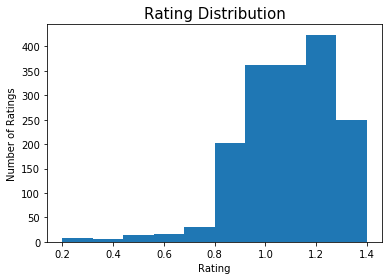

In [74]:
# plot the histogram for dogs' ratings while ignoring the outliers:

df_rating.rating.plot(kind='hist')
plt.title ('Rating Distribution', size=15)
plt.xlabel('Rating')
plt.ylabel('Number of Ratings');

majority of dogs have ratings 1 and above. This is agree  with the common feature of WeRateDogs where the numerator is higher than the denominator. 

#### 2- Analyse if there is relation between high rating and favorite_count  and retweet_count  

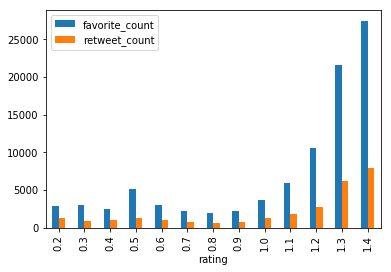

In [75]:
#plot the favorite_count' and 'retweet_count' for each rating
df_rating.groupby(['rating'])[ 'favorite_count', 'retweet_count'].mean().plot(kind='bar')


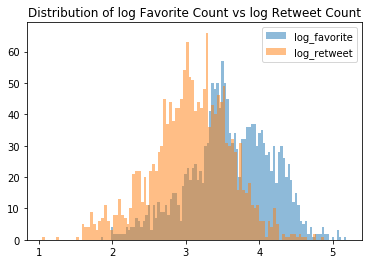

In [76]:
# take the log for favorite_count and retweet_count as they have large values: 
log_favorite = df_rating['favorite_count'].apply(lambda x: np.log10(x))
log_retweet = df_rating['retweet_count'].apply(lambda x: np.log10(x))

plt.hist(log_favorite, alpha=0.5, bins=100, label='Favorite Count')
plt.hist(log_retweet, alpha=0.5, bins=100, label='Retweet Count')

plt.title('Distribution of log Favorite Count vs log Retweet Count')
plt.legend(['log_favorite', 'log_retweet'])
plt.savefig('dist_favorite_retweet');

 favorite_count associated with higher ratings than the retweet_count.

#### 3-  Analyse how the 'rating', 'favorite_count', 'retweet_count' and 'followers_count' changed over the years

Text(0,0.5,'rating')

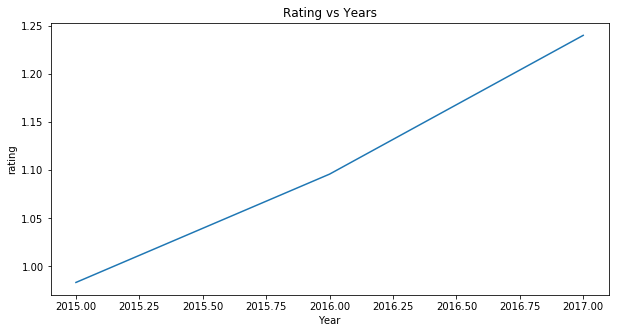

In [77]:
#plot rating vs Years

df.groupby(df['timestamp'].dt.year)['rating'].mean().plot(kind='line', figsize=(10,5))
plt.title('Rating vs Years')
plt.xlabel('Year')
plt.ylabel('rating')


Text(0,0.5,'favorite_count')

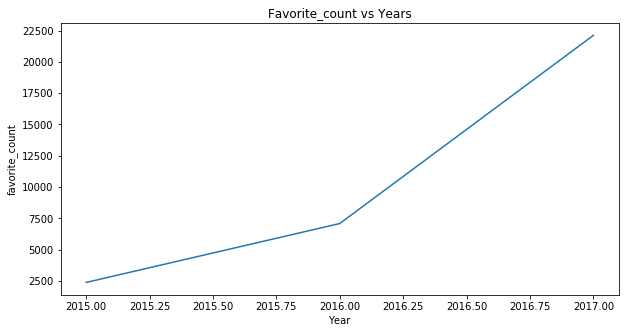

In [78]:
#plot favorite_count vs Years

df.groupby(df['timestamp'].dt.year)['favorite_count'].mean().plot(kind='line', figsize=(10,5))
plt.title('Favorite_count vs Years')
plt.xlabel('Year')
plt.ylabel('favorite_count')

Text(0,0.5,'retweet_count')

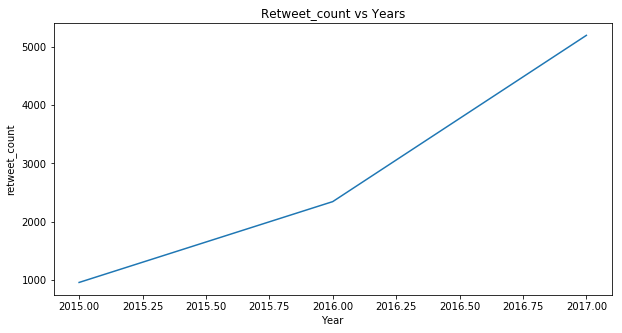

In [79]:
#plot retweet_count vs Years
df.groupby(df['timestamp'].dt.year)['retweet_count'].mean().plot(kind='line', figsize=(10,5))
plt.title('Retweet_count vs Years')
plt.xlabel('Year')
plt.ylabel('retweet_count')


Text(0,0.5,'followers_count')

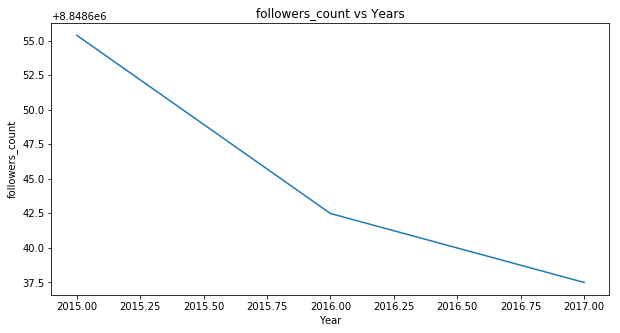

In [80]:
#plot followers_count vs Years
df.groupby(df['timestamp'].dt.year)['followers_count'].mean().plot(kind='line', figsize=(10,5))
plt.title('followers_count vs Years')
plt.xlabel('Year')
plt.ylabel('followers_count')

while all the parameters  'rating', 'favorite_count' and 'retweet_count' increased ovre years, 'followers_count' decreased!

#### 4-Find out which dogs' breeds  is the most common

In [81]:
df.pred.describe()

count     1678            
unique    113             
top       golden_retriever
freq      157             
Name: pred, dtype: object

In [82]:
df.pred.value_counts().describe()

count    113.000000
mean     14.849558 
std      22.237846 
min      1.000000  
25%      4.000000  
50%      8.000000  
75%      16.000000 
max      157.000000
Name: pred, dtype: float64

In [83]:
top_breed=df.groupby('pred').filter(lambda x: len(x) >= 30)



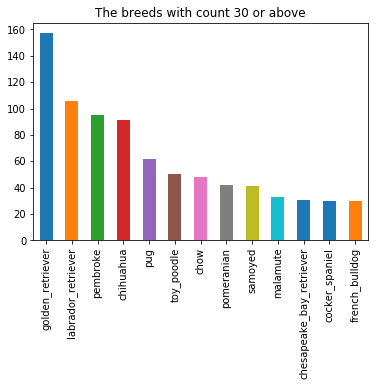

In [84]:
# plot the top breeds
top_breed['pred'].value_counts().plot(kind = 'bar')
plt.title('The breeds with count 30 or above');

find the ratings of these breeds

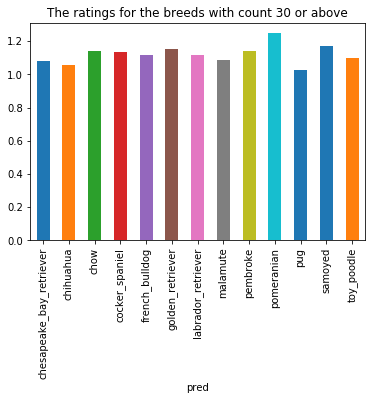

In [85]:
# plot the rating of top breeds
top_breed.groupby(['pred'])['rating'].mean().plot(kind = 'bar')
plt.title('The ratings for the breeds with count 30 or above');

In [86]:
# find the min rating for the top dog breeds: 
top_breed.groupby(['pred'])['rating'].mean().min()


1.0241935483870968

The most common breed is golden_retriever. All top breeds have rating above 1. 

#### 5-Find out which dogs' names  is the most common

In [87]:
df.name.describe()

count     1678
unique    832 
top       None
freq      499 
Name: name, dtype: object

In [88]:
top_name=df.groupby('name').filter(lambda x: len(x) >= 8 and len(x) <=10)


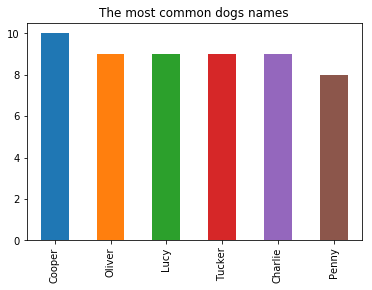

In [89]:
# plot the common names
top_name.name.value_counts().plot(kind='bar')
plt.title('The most common dogs names');

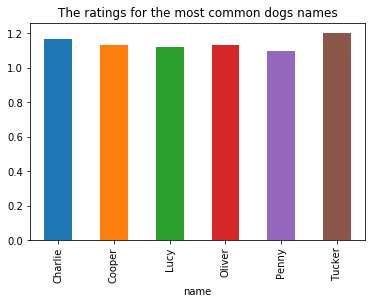

In [90]:
# plot the rating of common names
top_name.groupby(['name'])['rating'].mean().plot(kind = 'bar')
plt.title('The ratings for the most common dogs names');

In [92]:
top_name.groupby(['name'])['rating'].mean().min()

1.0999999999999999